<a href="https://colab.research.google.com/github/Jacob-Allebach/Jacob-Allebach.github.io/blob/main/CMPSC_310_Activity8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 8: Classification Example**


Checking that we have a specific version of python and sklearn. Also imports numpy.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np

MNIST dataset of images of handwritten numeric digits, downloaded from sklearn. Numpy array: (X,y) <- X is 2 dimensional, y is 1 dimensional.

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

70000 is the number of images and 784 is the number of features. Each feature represents a pixel's intensity. X is input data, y is output/target data.

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

matplotlib used to display images. `plt.imshow(image, cmap="binary")` takes image and gives a greyscale colormap.

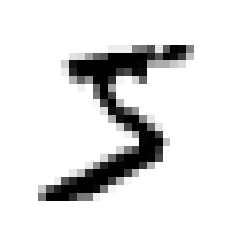

In [9]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

Casting an unspecified type as an integer.

In [10]:
y = y.astype(np.uint8)

Splitting up the X data and the y array.

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Creating target vectors.

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

SGD (Stochastic gradient descent) Classifier: fit and predict (training and testing). Training it on the data from images of number 5.

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Guessing if the image is a 5.

In [14]:
sgd_clf.predict([some_digit])

array([ True])

# **Performance Measures**

Cross-validation technique is part of the sklearn library. `cross_val_score` essentially gives accuracy of data for all 3 different metrics. Accuracy is not always the best metric to evaluate on.

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Another cross-validation, but instead of returning accuracy, it returns the predictions for the classes.

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Creates a confusion matrix for the predictions.

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Pretending we have a perfect classifier.

In [18]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [20]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [21]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846